## Wine Recommendation by taster

Analizing the database of wine reviews: [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) 


inspired by [wine-recommender](https://www.kaggle.com/sudhirnl7/wine-recommender/notebook)

### Import and read csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS


%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

In [2]:
path = '2-Data/wine_130k.csv'

wines = pd.read_csv(path, low_memory=False)

In [3]:
print(wines.shape)
wines.head()

(120915, 14)


,Unnamed: 0,Index_P,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,2,2,US,"Tart and snappy, the flavors of lime flesh and...",Unknown,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,Unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


## Taster Name

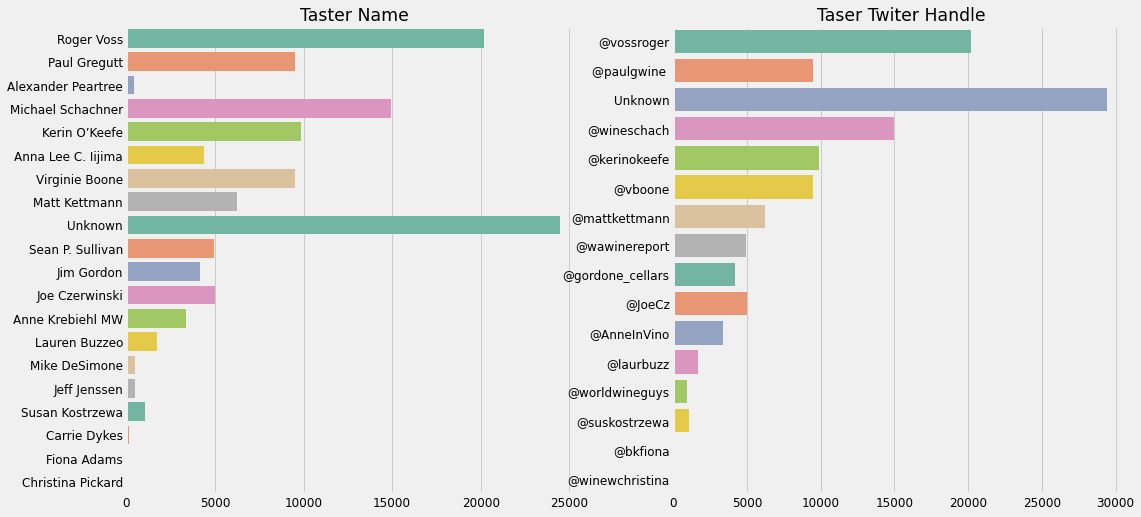

In [4]:
f,ax = plt.subplots(1,2, figsize = (16,8))
ax1,ax2 = ax.flatten()
sns.countplot(y = wines['taster_name'], palette = 'Set2', ax =ax1)
ax1.set_title('Taster Name')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.countplot(y = wines['taster_twitter_handle'], palette = 'Set2', ax =ax2)
ax2.set_title('Taser Twiter Handle')
ax2.set_xlabel('')
ax2.set_ylabel('');

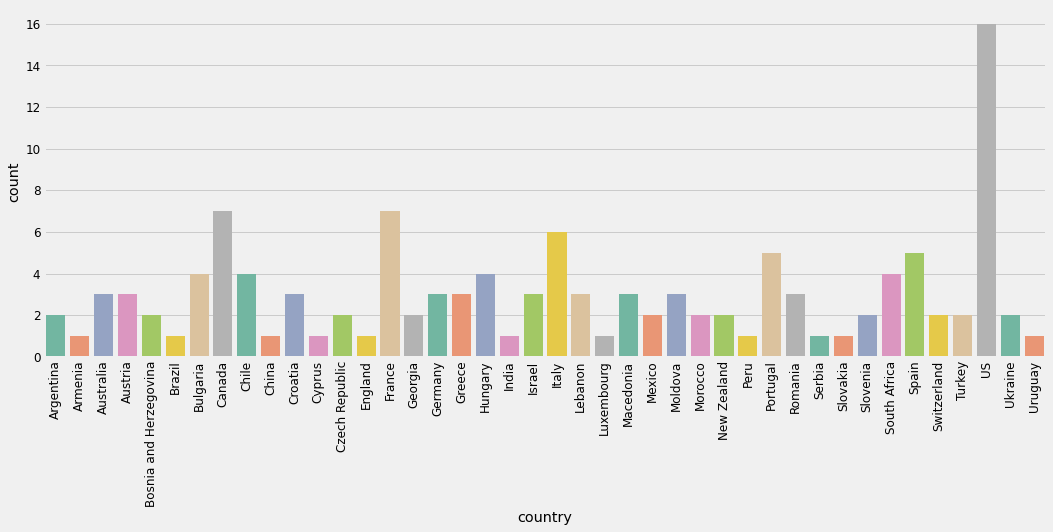

In [5]:
plt.figure(figsize = (16,6))
cnt = wines.groupby(['country','taster_name',]).count().reset_index()
sns.countplot(x = cnt['country'], palette='Set2')
plt.xticks(rotation = 90);

## Description

(-0.5, 399.5, 199.5, -0.5)

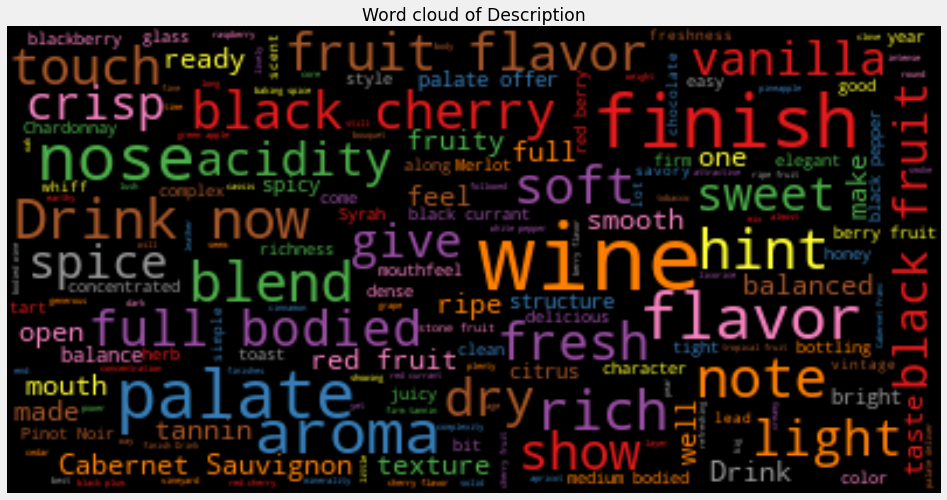

In [6]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wines['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

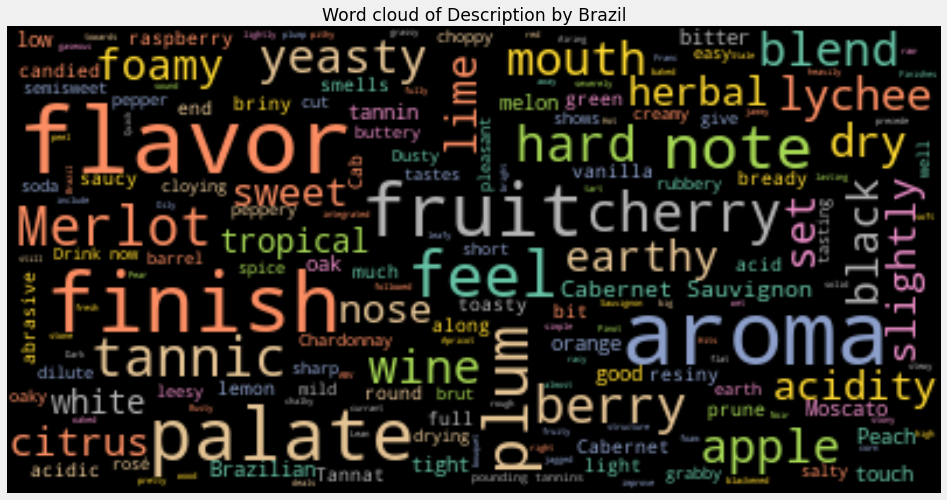

In [7]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description by Brazil')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS)
wc.generate(' '.join(wines[wines['country'] =='Brazil']['description']))
plt.imshow(wc.recolor(colormap='Set2'),interpolation="bilinear")
plt.axis('off')

### Recommender system is made using Nearest Neighbors algorithm.

In [8]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [9]:
wine1 = wines.copy()

In [10]:
col = ['province','variety','points']
wine1 = wines[col]
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] >85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [11]:
knn = NearestNeighbors(n_neighbors=10,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [12]:
query_index = np.random.choice(wine_pivot.shape[0])
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

Recommendation for Red Blend:

1: White Blend with distance: 0.5148860223184455
2: Bordeaux-style Red Blend with distance: 0.5276323079076107
3: Cabernet Sauvignon with distance: 0.5301658240583668
4: Syrah with distance: 0.5316166983187536
5: Merlot with distance: 0.5546920416592955


In [15]:
w_index = wine_pivot.index.tolist()
print(w_index)

['Abouriou', 'Agiorgitiko', 'Aglianico', 'Albana', 'Albanello', 'Albariño', 'Albarossa', 'Aleatico', 'Alfrocheiro', 'Alicante', 'Alicante Bouschet', 'Aligoté', 'Alsace white blend', 'Altesse', 'Alvarelhão', 'Alvarinho', 'Alvarinho-Chardonnay', 'Ansonica', 'Antão Vaz', 'Apple', 'Aragonez', 'Aragonês', 'Argaman', 'Arinto', 'Arneis', 'Assyrtico', 'Assyrtiko', 'Austrian Red Blend', 'Austrian white blend', 'Auxerrois', 'Avesso', 'Azal', 'Babić', 'Babosa Negro', 'Baga', 'Baga-Touriga Nacional', 'Barbera', 'Barbera-Nebbiolo', 'Bastardo', 'Bical', 'Black Monukka', 'Black Muscat', 'Blanc du Bois', 'Blatina', 'Blauburger', 'Blauburgunder', 'Blauer Portugieser', 'Blaufränkisch', 'Bobal', 'Bombino Bianco', 'Bombino Nero', 'Bordeaux-style Red Blend', 'Bordeaux-style White Blend', 'Bovale', 'Boğazkere', 'Braucol', 'Bual', 'Cabernet', 'Cabernet Blend', 'Cabernet Franc', 'Cabernet Franc-Cabernet Sauvignon', 'Cabernet Franc-Carmenère', 'Cabernet Franc-Lemberger', 'Cabernet Franc-Malbec', 'Cabernet Fran

In [23]:
query_index = w_index.index('Merlot')
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

Recommendation for Merlot:

1: Cabernet Sauvignon with distance: 0.45658321226200915
2: Bordeaux-style Red Blend with distance: 0.5383232928162476
3: Syrah with distance: 0.5481390021190775
4: Cabernet Sauvignon-Merlot with distance: 0.5532216091869988
5: Red Blend with distance: 0.5546920416592955
